# Assignment #2

Please follow instruction below to complete your assignment. 
You are expected to provide:
- IPython notebook
- HTML export of this notebook

Please use code blocks to comment and explain your code.

# STUDENT ID: 28176

In [99]:
%matplotlib inline 
import os, sys
import json

import random
import numpy as np
import networkx as nx
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt

# Import any other package you may need


## Helper functions for data visualization

In [100]:
def visualize_grid(bonds, dims, funcPercolationCheck=None, figname=None):
    '''
    Generic data visualization function
    
    - bonds: list object with lists of active bonds. [[((0,1), (1,1)), ((1,1), (2,1))], [((4,5), (4,6)), ((4,6), (5,6))]]
    - dims: dimensionality of the grid.
    - funcPercolationCheck: function name for checking whether a cluster is percolating
    - figname: path and name for a figure file ex: figures/sample_05.pdf
    '''
    maxDim = np.max(dims)
    fig = plt.figure(figsize=(10*dims[0]/maxDim, 10*dims[1]/maxDim))
    sites = list()
    for i in range(0,dims[0]+1):
        for j in range(0,dims[1]+1):
            sites.append([i,j])
    sites = np.array(sites)
    plt.scatter(sites[:,0], sites[:,1], s=1, c='0.2')
    
    random.shuffle(bonds)
    for i,bgrp in enumerate(bonds):
        #print(bgrp)
        isPercolating = False
        if funcPercolationCheck != None:
            isPercolating = funcPercolationCheck(bgrp, dims)
        for barr in bgrp:
            for j in range(1,len(barr)):
                plt.plot([barr[j-1][0], barr[j][0]], [barr[j-1][1], barr[j][1]], 
                         c=matplotlib.cm.get_cmap('tab20')(i/len(bonds)), 
                         linewidth=3 if isPercolating else 1)
    
    plt.xticks([])
    plt.yticks([])
    plt.xlim((-1, dims[0]+1))
    plt.ylim((-1, dims[1]+1))
    
    if figname != None:
        plt.savefig(figname, dpi=300, bbox_inches='tight')
    

## Simulate percolation

Main Functions:

In [101]:
def create_bonds(dimensions, pthr):
    '''
    Create bonds as 2D array
    - dimensions: tuple or array that has height and width of the grid. Example: if dimesions are [50,50], there will be 51x51 nodes in total which are indexed from 0 to 50 for both x and y values
    - pthr: probability for a bond to occur or not

    Format:
    - Each node is represented with a tuple of coordinates. Example: (2, 3) is the node in the column number 2 and row number 3
    - A bond is represented with a tuple of two nodes. Example: ( (2, 3), (3, 3) ) is the bond between the nodes (2, 3) and (3, 3)
    - A cluster is represented with a list of bonds. Example: [((0, 0), (0, 1))] is the cluster consist of a single bond
    - Bonds list will be consist of clusters. Example: [[((0, 0), (0, 1))]] is a bonds list consist of a single cluster

    For example if dimesions = (2,2) and pthr = 1, the bonds list will contain all possible bonds in lattice since the probability is 1 and it would be like: [[((0, 0), (1, 0))], [((0, 0), (0, 1))], [((1, 0), (2, 0))], [((1, 0), (1, 1))], [((2, 0), (2, 1))], [((0, 1), (1, 1))], [((0, 1), (0, 2))], [((1, 1), (2, 1))], [((1, 1), (1, 2))], [((2, 1), (2, 2))], [((0, 2), (1, 2))], [((1, 2), (2, 2))]]

    '''
    bonds = list()

    for y in range(dimensions[1]+1):
        for x in range(dimensions[0]+1):
            currentNode = (x, y)
            rightNode = (x+1, y)
            upperNode = (x, y+1)

            if (x != dimensions[0] and random.random() < pthr):
                newHorizontalBond = (currentNode, rightNode)
                newCluster = [newHorizontalBond]
                bonds.append(newCluster)

            if (y != dimensions[1] and random.random() < pthr):
                newVerticalBond = (currentNode, upperNode)
                newCluster = [newVerticalBond]
                bonds.append(newCluster)

    return bonds

def find_clusters(bonds):
    '''
    Find clusters of occupied cells in the grid
    - bonds: list of bond lists
    
    Return:
    - clusters: list of bonds clustered together sorted from smallest to largest cluster
    - the format of clusters to be returned must be same as explained in function create_bonds()
    '''
    clusters = list()
    
    # FILL HERE

    # Create a graph
    G = nx.Graph()

    # Add all the bonds as edges in the graph
    for cluster in bonds:
        for bond in cluster:
            G.add_edge(*bond)

    # Find connected components (clusters) in the graph
    connected_components = nx.connected_components(G)

    # Convert the connected components to bonds format
    for component in connected_components:
        cluster = []
        for node1 in component:
            for node2 in G.neighbors(node1):
                if (node1 < node2):
                    bond = (node1, node2)
                    cluster.append(bond)
        clusters.append(cluster)

    clusters = sorted(clusters, key=len)
    
    return clusters

def check_percolation(cluster, dims):
    '''
    Check whether given grid percolated
    - cluster: list of bonds in the same cluster
    
    Return:
    - isPercolating: True if percolating (left to right or top to bottom)

    * left right : node with x = 0 and node with x = dims[0]
    * up down : node with y = 0 and node with y = dims[1]

    '''
    
    left = False
    for bond in cluster:
        if bond[0][0] == 0 or bond[1][0] == 0:
            left = True
            break

    if (left == True):
        right = False
        for i in range(len(cluster))[::-1]:
            if cluster[i][0][0] == dims[0] or cluster[i][1][0] == dims[0]:
                right = True
                break
        
        # Left to right
        if (right == True):
            return True
    
    down = False
    for bond in cluster:
        if bond[0][1] == 0 or bond[1][1] == 0:
            down = True
            break

    if (down == True):
        up = False
        for i in range(len(cluster))[::-1]:
            if cluster[i][0][1] == dims[1] or cluster[i][1][1] == dims[1]:
                up = True
                break
        
        # down to up
        if (up == True):
            return True

    # no percolation
    return False

def hasPercolatingCluster(clustersList, dims):
    for i in range(len(clustersList))[::-1]:
        if (check_percolation(clustersList[i], dims) == True):
            return True
    return False

Testing the functions:

<ipython-input-3-46288aa9f30d>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c=matplotlib.cm.get_cmap('tab20')(i/len(bonds)),


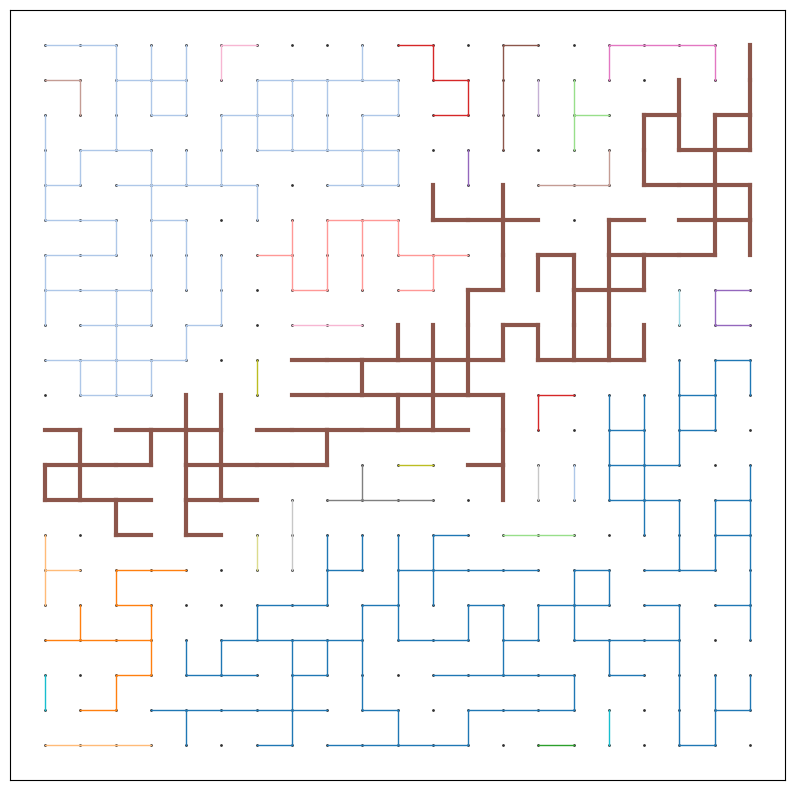

In [98]:
pval = 0.51
dims = (20,20)

# Keep generating until finding percolating lattice
while True:
    bonds = create_bonds(dims, pval)
    clusteredBonds = find_clusters(bonds)

    if hasPercolatingCluster(clusteredBonds, dims) == True:
        visualize_grid(clusteredBonds, dims, check_percolation)
        break


In [103]:
NRANDOM = 20
DIMS = (50,50)

# Let's only explore between 0.05 and 0.75
pExplore = np.linspace(0,0.8,17)[1:][:-1]
pExpand = np.linspace(0.45,0.55,21)[1:] # Fill this array to find more accurate estimation.

expResults = list()
for n in range(NRANDOM):
    #for pval in pExplore:   
    for pval in pExpand:
        bonds = create_bonds(dims, pval)
        clusteredBonds = find_clusters(bonds)
                
        expResults.append({
            'p': pval,
            'idx': n,
            'dim': DIMS,
            #'isPercolated': check_percolation(clusteredBonds[-1], DIMS),
            'isPercolated' : hasPercolatingCluster(clusteredBonds, DIMS),
            'clusters': clusteredBonds,
        })
        
        print({k:v for k,v in expResults[-1].items() if k != 'clusters'})
        
        # Let's keep the latest experiment result on a file
        with open('percolation_experiments.html', 'a') as fl:
            fl.write('{}\n'.format(json.dumps(expResults[-1])))

{'p': 0.455, 'idx': 0, 'dim': (50, 50), 'isPercolated': False}
{'p': 0.46, 'idx': 0, 'dim': (50, 50), 'isPercolated': False}
{'p': 0.465, 'idx': 0, 'dim': (50, 50), 'isPercolated': False}
{'p': 0.47000000000000003, 'idx': 0, 'dim': (50, 50), 'isPercolated': False}
{'p': 0.47500000000000003, 'idx': 0, 'dim': (50, 50), 'isPercolated': False}
{'p': 0.48000000000000004, 'idx': 0, 'dim': (50, 50), 'isPercolated': False}
{'p': 0.48500000000000004, 'idx': 0, 'dim': (50, 50), 'isPercolated': False}
{'p': 0.49000000000000005, 'idx': 0, 'dim': (50, 50), 'isPercolated': False}
{'p': 0.49500000000000005, 'idx': 0, 'dim': (50, 50), 'isPercolated': False}
{'p': 0.5, 'idx': 0, 'dim': (50, 50), 'isPercolated': False}
{'p': 0.505, 'idx': 0, 'dim': (50, 50), 'isPercolated': False}
{'p': 0.51, 'idx': 0, 'dim': (50, 50), 'isPercolated': False}
{'p': 0.515, 'idx': 0, 'dim': (50, 50), 'isPercolated': False}
{'p': 0.52, 'idx': 0, 'dim': (50, 50), 'isPercolated': False}
{'p': 0.525, 'idx': 0, 'dim': (50, 50),

## ***Experiments Part***

# Simulate bond percolation on NxN square lattice for multiple times for gaining the values:
1. Percolation probabilities
2. Mean and Standart Deviation of Percolation Probabilities on different N values
3. Average finite cluster sizes



> To calculate average finite cluster sizes, I have modified *hasPercolatingCluster()* function a little bit for calculating the average finite sizes along with the percolation status:

In [7]:
# Returns a pair which first is whether it has percolating cluster, second is the average finite cluster size
def hasPercolatingCluster_and_AverageFiniteSize(clustersList, dims):

    # Returns how many unique nodes in a cluster
    def clusterSize(cluster):
        uniqueNodes = set()

        for bond in cluster:
            node1, node2 = bond
            uniqueNodes.add(node1)
            uniqueNodes.add(node2)
        
        return len(uniqueNodes)
    
    isPercolating = False
    finiteClusterNum = 0
    finiteClusterSizeSum = 0
    for i in range(len(clustersList))[::-1]:
        if check_percolation(clustersList[i], dims) == True:
            isPercolating = True
        else:
            finiteClusterNum += 1
            finiteClusterSizeSum += clusterSize(clustersList[i])

    avgSize = finiteClusterSizeSum / finiteClusterNum if finiteClusterNum > 0 else 0
    
    return isPercolating, avgSize

Simulation functions:

In [9]:
# Simulates for NxN lattice for num_simulations times for different p_values
# Returns:
# - Percolation frequencies
# - Percolation probabilities
# - Average finite cluster size
# - Average finite cluster size percentage = AvgFiniteSize / N^2

def simulate_for_NxN(N, num_simulations, p_values):
    dims = (N, N)

    percFreqs = list()
    percProbs = list()
    avgFiniteSizes = list()
    avgFiniteSizePercents = list()

    for p_value in p_values:
        percolated = 0
        avgFiniteSizeSum = 0
        for i in range(num_simulations):
            bonds = create_bonds(dims, p_value)
            clusteredBonds = find_clusters(bonds)

            isPercolating, avgSize = hasPercolatingCluster_and_AverageFiniteSize(clusteredBonds, dims)

            if isPercolating:
                percolated += 1
            else:
                avgFiniteSizeSum += avgSize

        percFreqs.append(percolated)
        percProbs.append(percolated/num_simulations)

        tempAvg = avgFiniteSizeSum / num_simulations

        avgFiniteSizes.append(tempAvg)
        avgFiniteSizePercents.append((tempAvg/(N**2))*100)

    return percFreqs, percProbs, avgFiniteSizes, avgFiniteSizePercents


def simulateExperiment(N_values, p_values, num_simulations):
    results_P = list() # results.size = N
    results_finiteSize = list()

    for N in N_values:
        percFreqs, percProbs, avgFiniteSizes, avgFiniteSizePercents = simulate_for_NxN(N, num_simulations, p_values)        

        result_p = (percFreqs, percProbs, N)
        results_P.append(result_p)

        result_finiteSize = (avgFiniteSizes, avgFiniteSizePercents, N)
        results_finiteSize.append(result_finiteSize)

        print("N={} done".format(N))

    results_MEAN = list() #results2.size = p_values.size
    results_STD = list()

    for i in range(len(p_values)):
        temp = list() # size = N_values.size
        for result in results_P:
            temp.append(result[1][i])
        
        mean = np.mean(temp)
        stddev = np.std(temp)

        results_MEAN.append(mean)
        results_STD.append(stddev)


    return results_P, results_MEAN, results_STD, results_finiteSize;

Plotting functions:

In [38]:
def plot_percolation_vs_p(p_values, results, num_simulations, figsize=(6.4, 4.8), xticks=None):

    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'olive', 'gray', 'pink', 'cyan']

    fig, ax1 = plt.subplots(figsize=figsize)

    # Create a secondary y-axis for the second line (Percolation Probability)
    ax2 = ax1.twinx()

    ax1.set_xlabel('p values')
    ax1.set_ylabel('Percolating Lattices (out of {})'.format(num_simulations))
    ax1.tick_params(axis='y')

    ax2.set_ylabel('Percolation Probability')
    ax2.tick_params(axis='y')    

    lines = list()

    for result, color in zip(results, colors):
        line = ax1.plot(p_values, result[0], color=color, label='N={}'.format(result[2]))
        lines.append(line)
        ax2.plot(p_values, result[1], color=color, label='N={}'.format(result[2]))

    # Legend
    legend1 = ax1.legend(handles=[line[0] for line in lines], loc='upper left')
    ax1.add_artist(legend1)

    plt.title('Percolation Rates with different p values on NxN Square Lattice')
    
    plt.xticks(xticks)

    plt.tight_layout()
    plt.show()

def plot_mean_std_vs_p(p_values, y_mean, y_std, figsize=(6.4, 4.8), xticks=None):
    fig, ax = plt.subplots(figsize=figsize)

    ax2 = ax.twinx()

    lines = list()

    lines.append(ax.plot(p_values, y_mean, 'blue', label="mean"))
    ax.set_xlabel('p values')
    ax.set_ylabel('mean', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')

    lines.append(ax2.plot(p_values, y_std, 'green', label="std"))
    ax2.set_ylabel('std', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    legend = ax.legend(handles=[line[0] for line in lines], loc='upper left')
    ax.add_artist(legend)

    plt.title('Mean and Standart Deviation of Percolation Probabilities on different N values')
   
    plt.xticks(xticks)

    plt.show()

def plot_avgfinitesize_vs_p(p_values, results, figsize=(6.4, 4.8), xticks=None):
    
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'olive', 'gray', 'pink', 'cyan']

    fig, ax = plt.subplots(1, 2, figsize=figsize)

    ax[0].set_xlabel('p values')
    ax[0].set_ylabel('Size')
    ax[0].tick_params(axis='y')

    ax[1].set_xlabel('p values')
    ax[1].set_ylabel('Percentage')
    ax[1].tick_params(axis='y') 


    lines1 = list()
    lines2 = list()

    # Plot lines
    for result, color in zip(results, colors):
        line1 = ax[0].plot(p_values, result[0], color=color, label='N={}'.format(result[2]))
        line2 = ax[1].plot(p_values, result[1], color=color, label='N={}'.format(result[2]))
        
        lines1.append(line1)
        lines2.append(line2)

    # Legend
    legend1 = ax[0].legend(handles=[line[0] for line in lines1], loc='upper right')
    legend2 = ax[1].legend(handles=[line[0] for line in lines2], loc='upper right')

    ax[0].add_artist(legend1)
    ax[1].add_artist(legend2)

    ax[0].set_title('Average Finite Cluster Sizes')
    ax[1].set_title('Average Finite Cluster Sizes / N\u00b2')


    ax[0].set_xticks(xticks)
    ax[1].set_xticks(xticks)


    plt.tight_layout()
    plt.show()


Performing experiment:

In [11]:
N_values = [3, 5, 10, 15, 20, 25, 35]
p_values = np.arange(0, 1.05, 0.05)
num_simulations = 1000

results_P, results_mean, results_std, results_finiteSize = simulateExperiment(N_values, p_values, num_simulations)

N=3 done
N=5 done
N=10 done
N=15 done
N=20 done
N=25 done
N=35 done


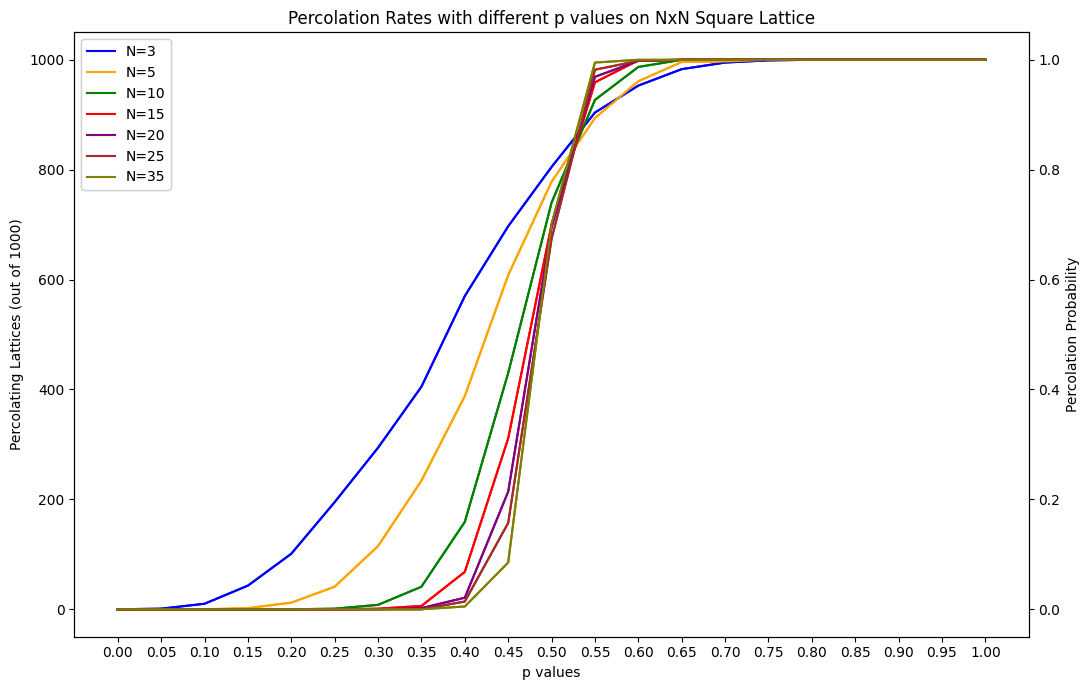

In [33]:
plot_percolation_vs_p(p_values, results_P, num_simulations, figsize=(11, 7), xticks=p_values[::1])

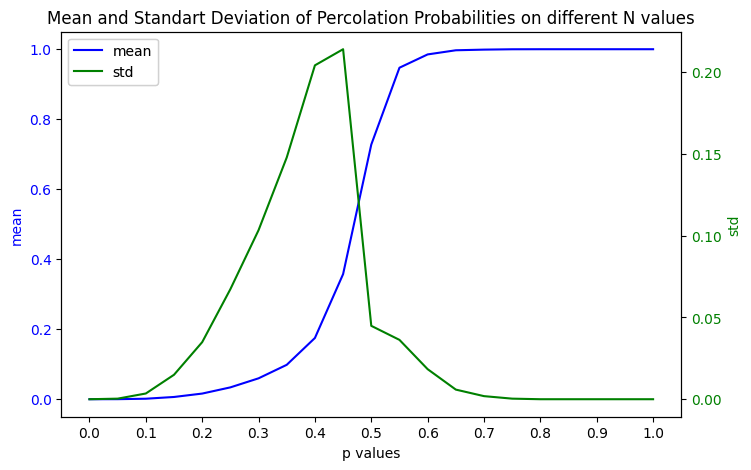

In [36]:
plot_mean_std_vs_p(p_values, results_mean, results_std, figsize=(8, 5), xticks=p_values[::2])

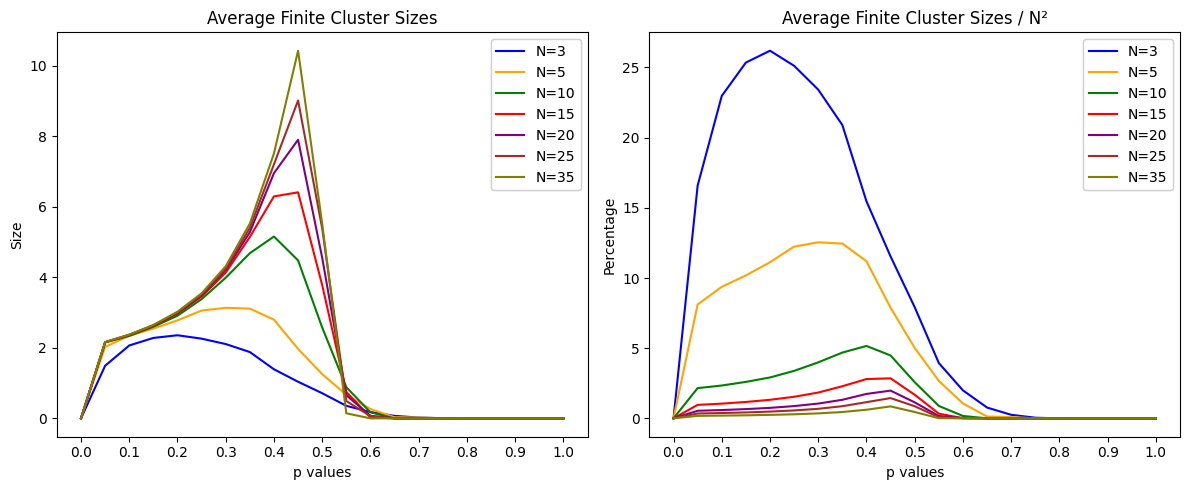

In [39]:
plot_avgfinitesize_vs_p(p_values, results_finiteSize, figsize=(12,5), xticks=p_values[::2])

## Estimating p$_c$ 

# In this part, I will try to estimate p$_c$ value for N values = [5, 10, 15, 20, 25]

# For each N value, following steps will be performed:
1. Simulate for different p values
2. Find the p$_c$ value such that all percolation probabilities for p values greater than the critical value are above a pre-defined threshold (I used 0.97).
3. Change the range of p_values to converge to p$_c$
4. Use the new range interval and repeat from step 1
5. Keep performing these steps until the p$_c$ value stays same up to 4th decimal place, after 5 times in a row

# After estimating p$_c$ values for each N value:
1. Plot the means of them
2. Test the p$_c$ values by using p_values interval of [p$_c$, 1]

At first, since we are going to perform tons of simulations, I rewrite the simulation functions to only calculate percolation probabilites. In order to save time, mean/standart deviation and average finite cluster sizes will not be calculated.

In [40]:
def simulate_for_NxN_2(N, num_simulations, p_values):
    dims = (N, N)

    percProbs = list()

    for p_value in p_values:
        percolated = 0
        for i in range(num_simulations):
            bonds = create_bonds(dims, p_value)
            clusteredBonds = find_clusters(bonds)
            if hasPercolatingCluster(clusteredBonds, dims):
                percolated += 1

        percProbs.append(percolated/num_simulations)

    return percProbs

def simulateExperiment_2(N_values, p_values, num_simulations):
    results_P = list()

    for N in N_values:
        percProbs = simulate_for_NxN_2(N, num_simulations, p_values)        

        result_p = (percProbs, N)
        results_P.append(result_p)

        print("N={} done".format(N))

    return results_P;

def find_p_critical_idx(percProbs, p_values, threshold):
    p_critical_index = None

    for i in range(len(percProbs))[::-1]:
        if percProbs[i] >= threshold:
            p_critical_index = i
        else:
            break

    return p_critical_index

# Example estimation process:

In [41]:
threshold = 0.97
p_range = (0, 1)
N = 10
p_values = np.linspace(p_range[0], p_range[1], 21)
num_simulations = 1000

percProbs_for_N = simulate_for_NxN_2(N, num_simulations, p_values)

In [42]:
print("p_values  Percolation Probs ")
for p, prob in zip(p_values, percProbs_for_N):
    print("  {:.2f}  :  {}".format(p, prob))
print()

p_critical_idx = find_p_critical_idx(percProbs_for_N, p_values, threshold)
p_critical = p_values[p_critical_idx]

print("P_critical value found = {:.3f}".format(p_critical))

new_p_range = ( p_values[p_critical_idx-1], p_values[p_critical_idx+1])

print("New interval is = [{:.2f},{:.2f}]".format(new_p_range[0], new_p_range[1]))

p_values  Percolation Probs 
  0.00  :  0.0
  0.05  :  0.0
  0.10  :  0.0
  0.15  :  0.0
  0.20  :  0.0
  0.25  :  0.0
  0.30  :  0.008
  0.35  :  0.039
  0.40  :  0.174
  0.45  :  0.428
  0.50  :  0.717
  0.55  :  0.923
  0.60  :  0.991
  0.65  :  0.999
  0.70  :  1.0
  0.75  :  1.0
  0.80  :  1.0
  0.85  :  1.0
  0.90  :  1.0
  0.95  :  1.0
  1.00  :  1.0

P_critical value found = 0.600
New interval is = [0.55,0.65]


# Estimating p$_c$ for N = [5, 10, 15, 20, 25]

In [43]:
# Try to estimate p_critical for an N value
def converge_to_p_critical(N, threshold, num_simulations, initRange, info=False):
    p_range = initRange

    p_critic_former = 0.0
    p_critic_const_counter = 0

    constant_threshold = 5

    while p_critic_const_counter < constant_threshold:
        if (info):
            print("Interval is = [{:.4f},{:.4f}]".format(p_critic_const_counter,p_range[0], p_range[1]))
            
        p_values = np.linspace(p_range[0], p_range[1], 21)

        percProbs_for_N = simulate_for_NxN_2(N, num_simulations, p_values)

        p_critical_idx = find_p_critical_idx(percProbs_for_N, p_values, threshold)

        if (p_critical_idx != None):
            p_critical = p_values[p_critical_idx]

            if (info):
                print("p_critic is found: {}".format(p_critical))

            if round(p_critical, 4) == round(p_critic_former, 4):
                p_critic_const_counter += 1
            else:
                p_critic_former = p_critical
                p_critic_const_counter = 0

            try:
                p_range = (p_values[p_critical_idx-1], p_values[p_critical_idx+1])
            except:
                p_range = p_range
                p_critic_const_counter += 1
    
    return p_critic_former

Find p$_c$ values and store them

In [44]:
p_critic_values = list()

N_values = [5, 10, 15, 20, 25]
threshold = 0.97
num_simulations = 1000
initialRange = (0, 1)

for N in N_values:
    p_critic_for_n = converge_to_p_critical(N, threshold, num_simulations, initialRange)
    p_critic_values.append(p_critic_for_n)
    print("For N={}, p_critical estimation is = {:.4f}".format(N, p_critic_for_n))

For N=5, p_critical estimation is = 0.6136
For N=10, p_critical estimation is = 0.5792
For N=15, p_critical estimation is = 0.5595
For N=20, p_critical estimation is = 0.5547
For N=25, p_critical estimation is = 0.5433


# Let's prepare a test to see how accurate the critical values found are:

In [45]:
def sortedInsert(x, listt):
    index = np.searchsorted(listt, x)
    return np.insert(listt, index, x)

# Define a p_values range from slightly below the smallest critical value to 1
p_values = np.linspace(round(min(p_critic_values), 2), 1, 21)
num_simulations = 1000

# Also insert critical values to p_values
for p in p_critic_values:
    p_values = sortedInsert(p, p_values)

p_values

array([0.54     , 0.5433   , 0.5546675, 0.5595   , 0.563    , 0.57915  ,
       0.586    , 0.609    , 0.61355  , 0.632    , 0.655    , 0.678    ,
       0.701    , 0.724    , 0.747    , 0.77     , 0.793    , 0.816    ,
       0.839    , 0.862    , 0.885    , 0.908    , 0.931    , 0.954    ,
       0.977    , 1.       ])

Simulate:

In [46]:
results = simulateExperiment_2(N_values, p_values, num_simulations)

N=5 done
N=10 done
N=15 done
N=20 done
N=25 done


Plotting function for not only showing percolation probabilites, but also p$_c$ values for respective N values:

In [64]:
def plot_percolation_vs_p_critic(p_values, results, p_critics, figsize=(6.4, 4.8), xticks=None):
    plt.figure(figsize=figsize)

    plt.xlabel('p values (p_critics highlighted)')
    plt.ylabel('Percolation Probability')
    plt.tick_params(axis='y')

    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

    lines1 = list()
    # Plot lines
    for result, p_critic, color in zip(results, p_critics, colors):
        line1 = plt.plot(p_values, result[0], color=color, label='N={}, p_c={:.5f}'.format(result[1], p_critic))

        # Add dashed lines to show p_critic values for each N
        pre_y = np.interp(p_critic, p_values, result[0])
        plt.plot([p_critic, p_critic], [pre_y, 0.85], linestyle='--', color=color)
        
        lines1.append(line1)


    ticks = [round(i,2) for i in np.linspace(0, 1, 21)]
    
    for i, tick in enumerate(ticks):
        if tick > max(p_critics):
            ticks = ticks[i:]
            break

    for critic in p_critics:
        ticks = sortedInsert(round(critic,2), ticks)

    plt.xticks(ticks)

    for i, critic in enumerate(p_critics):
        plt.gca().get_xticklabels()[i].set_color(colors[i])

    # Legend
    legend1 = plt.legend(handles=[line[0] for line in lines1], loc='upper right')
    plt.legend(loc="lower right")

    plt.title('Percolation Rates with different p values on NxN Square Lattice')

    if xticks != None:
        plt.xticks(xticks)

    plt.show()


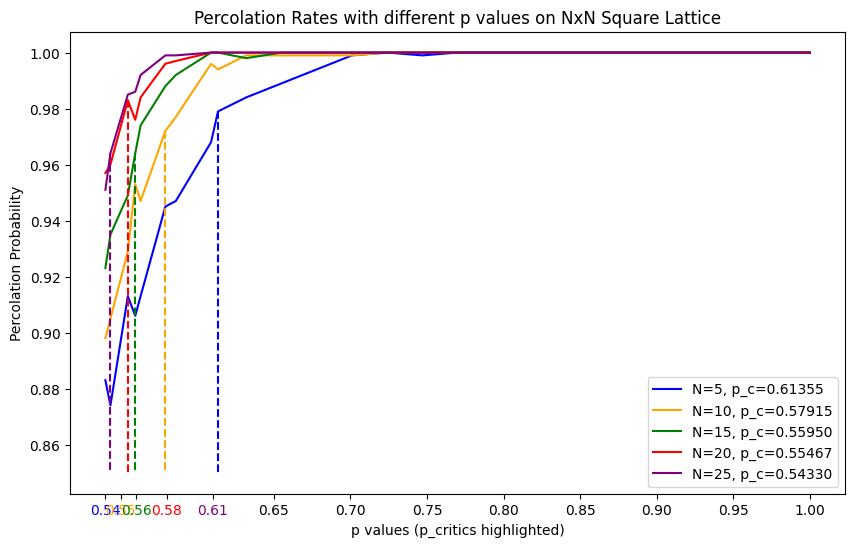

In [65]:
plot_percolation_vs_p_critic(p_values, results, p_critic_values, figsize=(10, 6))

Calculate mean of p$_c$ values for different system sizes:

In [66]:
p_critic_mean = np.mean(p_critic_values)

print("Mean of p_critical values for N = {} is {:.5f}".format(N_values, p_critic_mean))

Mean of p_critical values for N = [5, 10, 15, 20, 25] is 0.57003


p = 0.28501675000000004
p = 0.34202010000000005


<ipython-input-3-46288aa9f30d>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c=matplotlib.cm.get_cmap('tab20')(i/len(bonds)),


p = 0.39902345000000006
p = 0.4560268
p = 0.5130301500000001
p = 0.5700335
p = 0.62703685
p = 0.6840402
p = 0.74104355
p = 0.7980469000000001


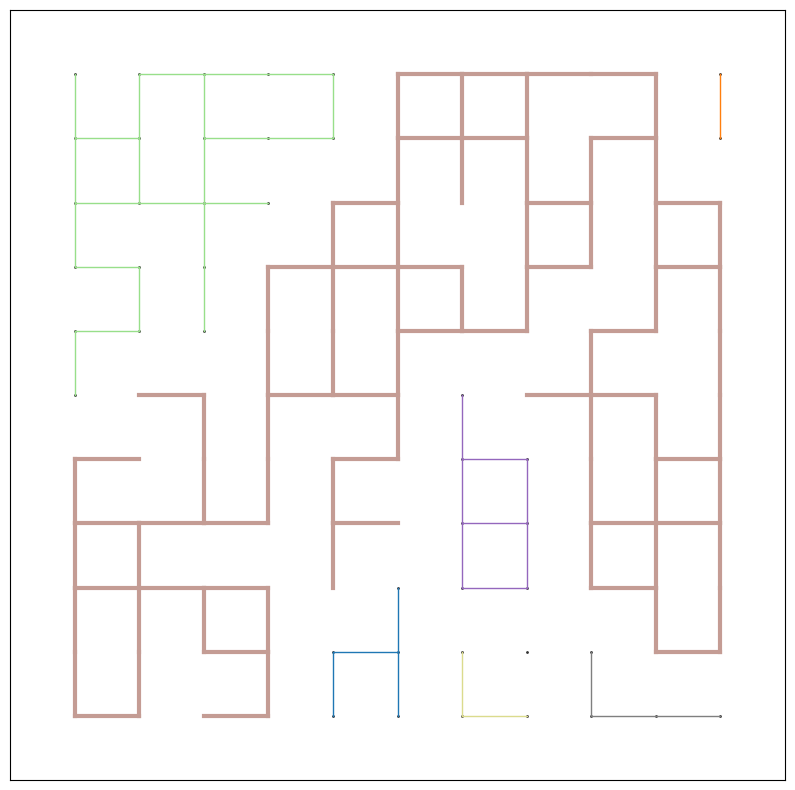

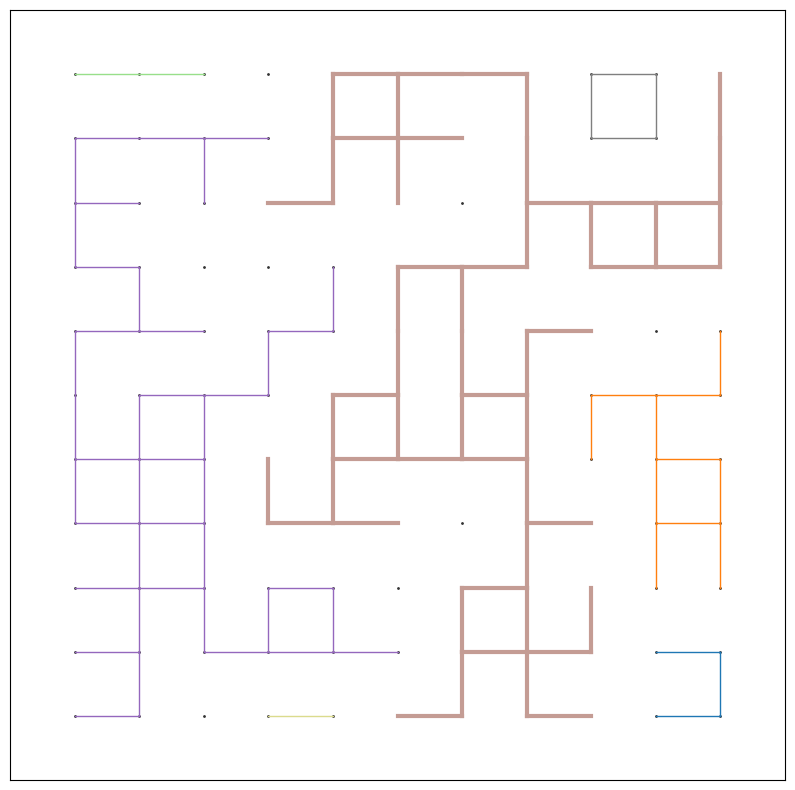

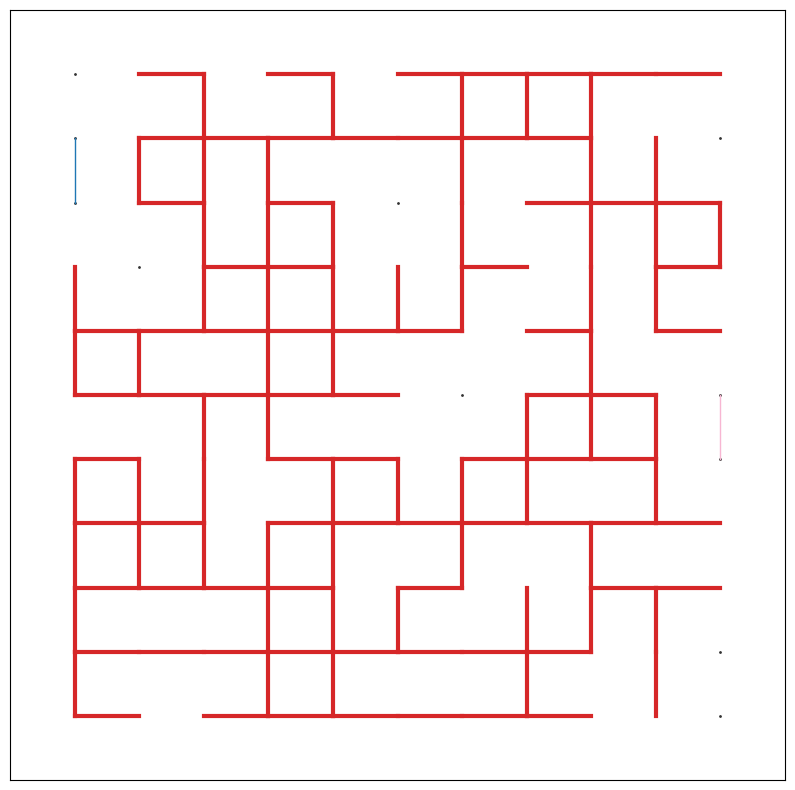

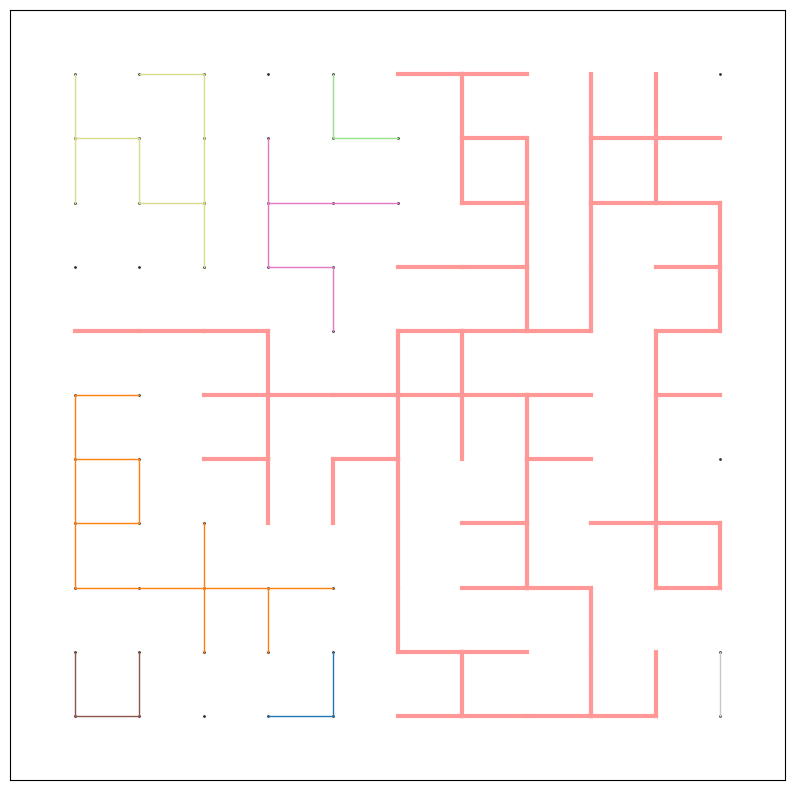

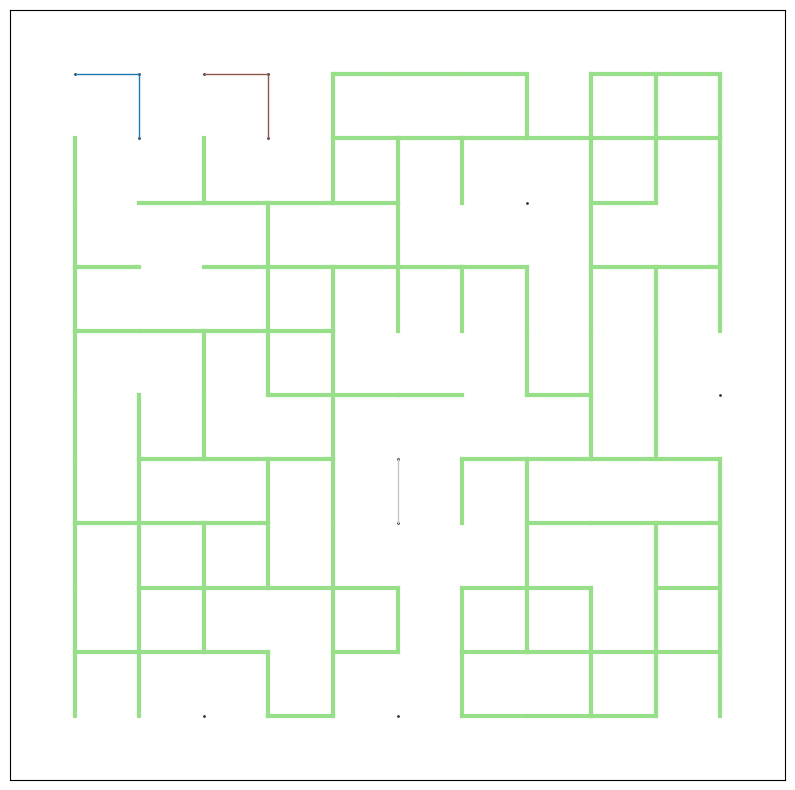

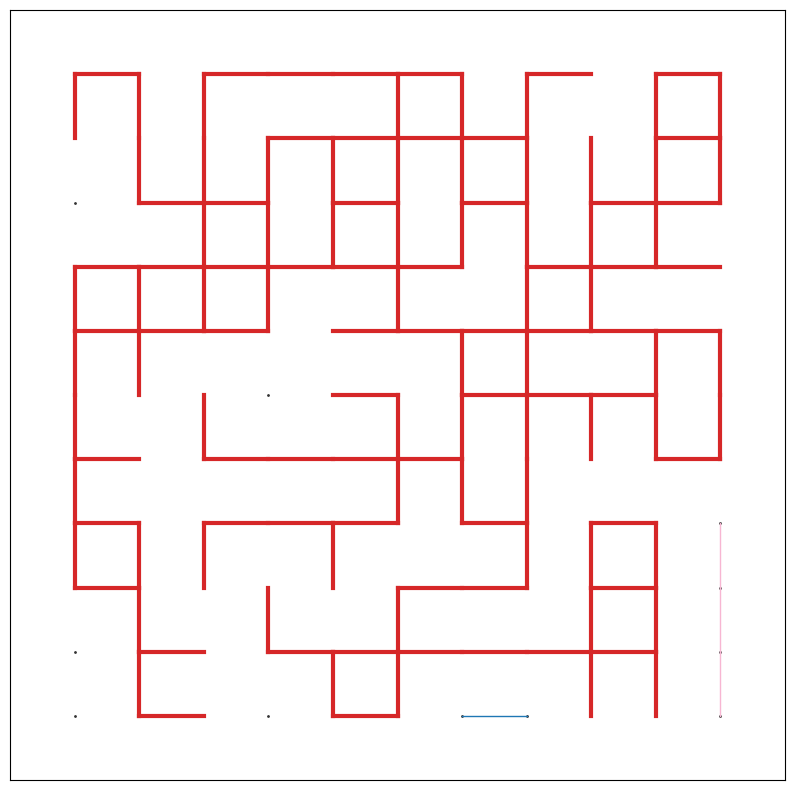

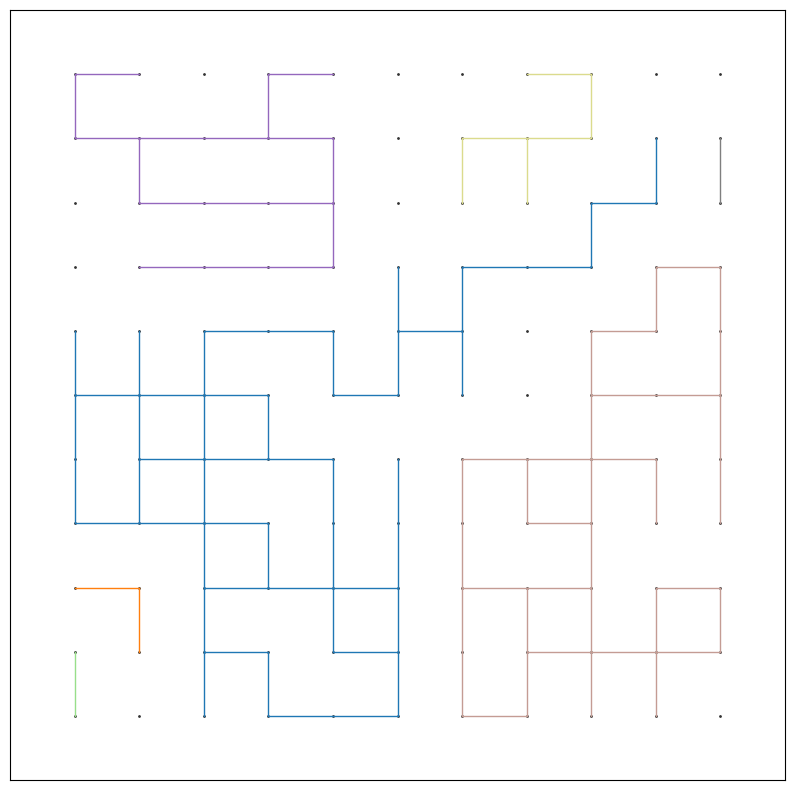

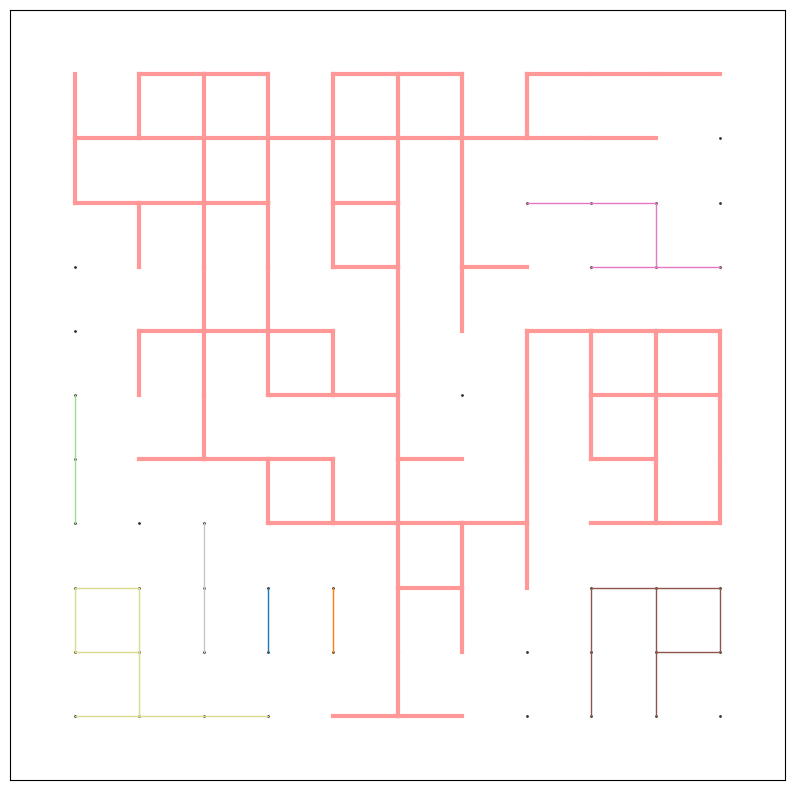

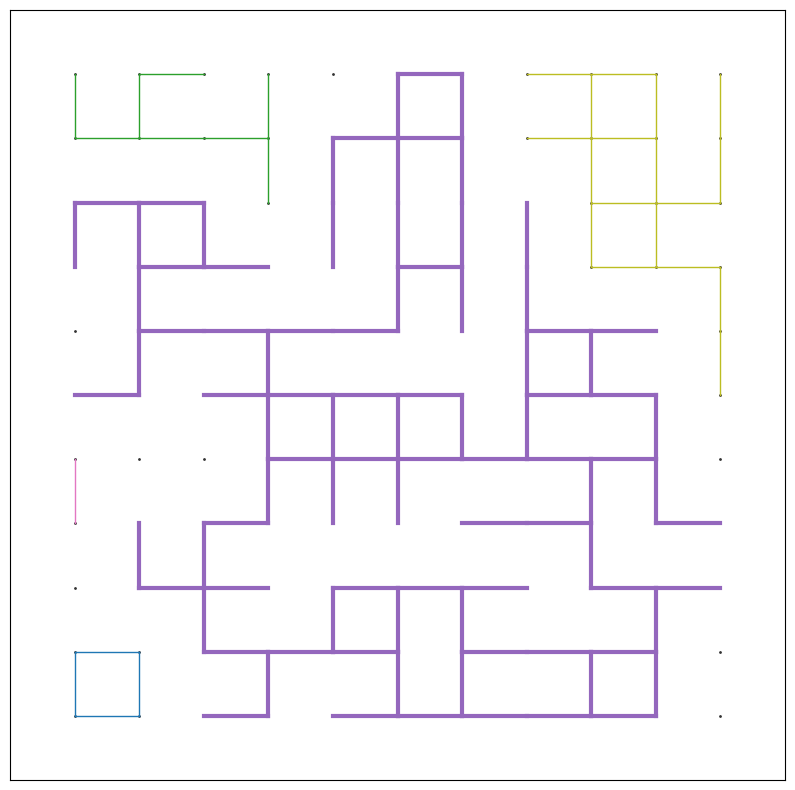

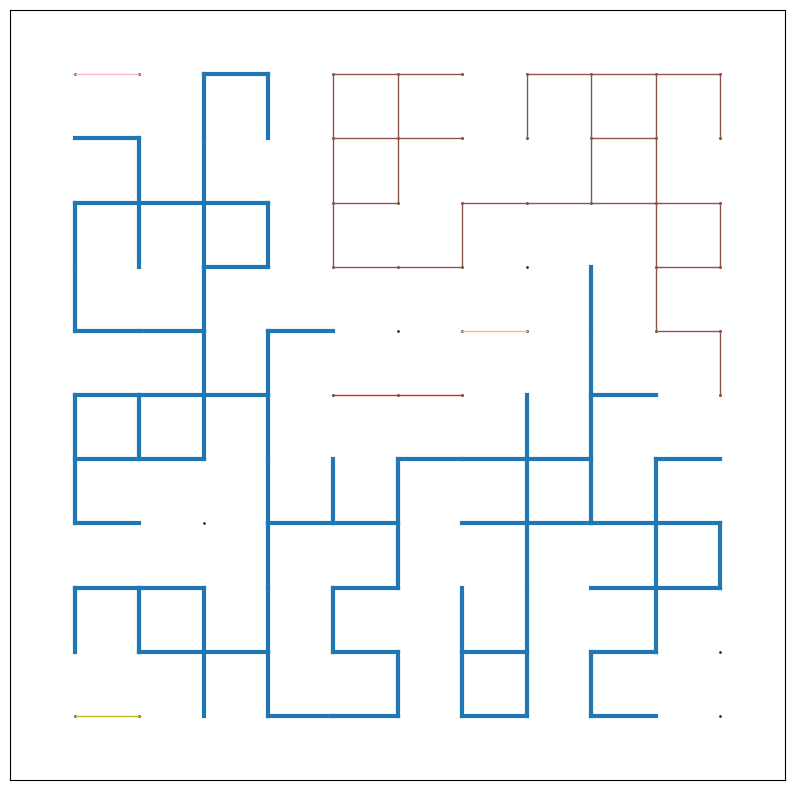

In [68]:
dims = (10,10)

p_vals = [p_critic_mean * percent for percent in np.arange(0.5, 1.5, 0.1)]
for p in p_vals:
    print("p = {}".format(p))
    bonds = create_bonds(dims, p_critic_mean)
    clusteredBonds = find_clusters(bonds)
    visualize_grid(clusteredBonds, dims, check_percolation)